In [1]:
import sys
sys.path += [".."]

import smbh
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [2]:
from astropy.cosmology import LambdaCDM
cosmo = LambdaCDM(H0 = 67.8, Om0 = 0.309, Ode0 = 0.73)

# Z and t parameterization

[-2.22289277  5.13671586 -4.92900515  3.71708597]


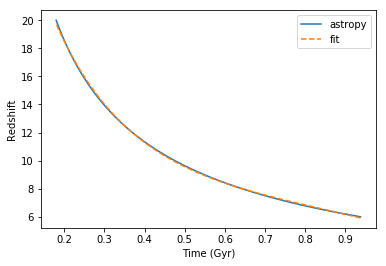

In [3]:
zs = np.linspace(6, 20)
ts = cosmo.age(zs).value

log_z = np.log(zs)

coeffs = np.polyfit(ts,  log_z, 3)
poly = np.poly1d(coeffs)

print(coeffs)

log_zs_ = poly(ts)
zs_ = np.exp(log_zs_)

fig, ax = plt.subplots()

ax.plot(ts, zs, label = 'astropy')
ax.plot(ts, zs_, '--', label = 'fit')

# ax.set_yscale('log')

ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Redshift')

ax.legend()

plt.show()

# H and Z

[ 0.0039385   0.11201693 -0.11131262]


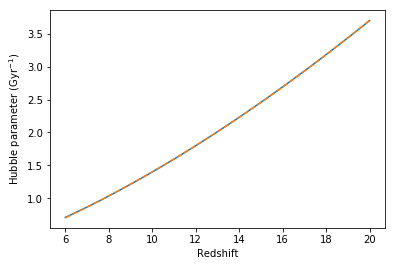

In [4]:
zs = np.linspace(6, 20)
hs = cosmo.H(zs).value
hs = smbh.HubbleToNaturalUnits(hs)

coeffs = np.polyfit(zs,  hs, 2)

poly = np.poly1d(coeffs)

hs_ = poly(zs)

fig, ax = plt.subplots()

ax.plot(zs, hs, label = 'astropy')
ax.plot(zs, hs_, '--', label = 'fit')

print(coeffs)

ax.set_xlabel('Redshift')
ax.set_ylabel('Hubble parameter (Gyr$^{-1}$)')

# ax.legend()

plt.show()